In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['FUC', 'NAG']
di_sugar2= ['LFucpa', 'DGlcpNAcb']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 71 
valid torsion1 and torsion2: (71, 71)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['2.F', '1.F'], ['1C4', '-'])
(['4.G', '1.G'], ['1C4', '4C1'])
(['4.F', '1.F'], ['1C4', '4C1'])
(['4.E', '1.E'], ['1C4', '4C1'])
(['3.D', '1.D'], ['1C4', '4C1'])
(['3.C', '1.C'], ['1C4', '4C1'])
(['6.E', '3.E'], ['1C4', '4C1'])
(['6.F', '3.F'], ['1C4', '4C1'])
(['6.K', '3.K'], ['1C4', '4C1'])
(['6.Q', '3.Q'], ['1C4', '4C1'])
(['6.M', '3.M'], ['1C4', '4C1'])
(['6.L', '3.L'], ['-', '4C1'])
(['6.N', '3.N'], ['1C4', '4C1'])
(['6.P', '3.P'], ['1C4', '4C1'])
(['6.R', '3.R'], ['1C4', '4C1'])
(['6.O', '3.O'], ['1C4', '-'])
(['5.B', '2.B'], ['1C4', '4C1'])
(['6.E', '3.E'], ['1C4', '4C1'])
(['6.C', '3.C'], ['1C4', '4C1'])
(['3.C', '1.C'], ['1C4', '4C1'])
(['4.C', '1.C'], ['1C4', '4C1'])
(['4.D', '1.D'], ['1C4', '4C1'])
(['7.E', '3.E'], ['1C4', '4C1'])
(['7.F', '3.F'], ['1C4', '4C1'])
(['3.G', '1.G'], ['-', '4C1'])
(['3.F', '1.F'], ['BO3', '4C1'])
(['3.E', '1.E'], ['1C4', '4C1'])
(['3.H', '1.H'], ['1C4', '4C1'])
(['3.C', '1.C'], ['1C4', '4C1'])
(['3.D', '1.D'], ['1C4', '4C1'])
(['4.C', '1.C'], [

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//4aha.pdb F FUC 2 C1
../../pdbs//4aha.pdb F NAG 1 O4
5003 4999
Connection found between 5003 and 4999
../../pdbs//6xun.pdb G FUC 4 C1
../../pdbs//6xun.pdb G NAG 1 O4
10143 10108
Connection found between(2) 10143 and 10108
../../pdbs//6xun.pdb F FUC 4 C1
../../pdbs//6xun.pdb F NAG 1 O4
10087 10052
Connection found between(2) 10087 and 10052
../../pdbs//6xun.pdb E FUC 4 C1
../../pdbs//6xun.pdb E NAG 1 O4
10031 9996
Connection found between(2) 10031 and 9996
../../pdbs//3asr.pdb D FUC 3 C1
../../pdbs//3asr.pdb D NAG 1 O4
4773 4758
Connection found between 4773 and 4758
../../pdbs//3asr.pdb C FUC 3 C1
../../pdbs//3asr.pdb C NAG 1 O4
4738 4723
Connection found between 4738 and 4723
../../pdbs//5f7m.pdb E FUC 6 C1
../../pdbs//5f7m.pdb E NAG 3 O4
8037 8012
Connection found between 8037 and 8012
../../pdbs//5f7m.pdb F FUC 6 C1
../../pdbs//5f7m.pdb F NAG 3 O4
8105 8080
Connection found between 8105 and 8080
../../pdbs//3sej.pdb K FUC 6 C1
../../pdbs//3sej.pdb K NAG 3 O4
23637 23612
C

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,4aha.pdb,F FUC 2 C2 C1 NAG 1 O4 C4,F FUC 2 C1 NAG 1 O4 C4 C5,138.847,212.6620,"([FUC(2_F_), NAG(1_F_)], [19.24, 25.95])",FUC(2_F_)-NAG(1_F_),LFucpa1-4DGlcpNAcb1-ROH,"([2.F, 1.F], [1C4, -])"
1,6xun.pdb,G FUC 4 C2 C1 NAG 1 O4 C4,G FUC 4 C1 NAG 1 O4 C4 C5,176.589,250.3820,"([FUC(4_G_), NAG(1_G_)], [37.95, 40.38])",FUC(4_G_)-[SIA(3_G_)-GAL(2_G_)]-NAG(1_G_),DNeup5Aca2-3DGalpb1-3[LFucpa1-4]DGlcpNAcb1-ROH,"([4.G, 1.G], [1C4, 4C1])"
2,6xun.pdb,F FUC 4 C2 C1 NAG 1 O4 C4,F FUC 4 C1 NAG 1 O4 C4 C5,173.737,252.7920,"([FUC(4_F_), NAG(1_F_)], [35.83, 38.07])",FUC(4_F_)-[SIA(3_F_)-GAL(2_F_)]-NAG(1_F_),DNeup5Aca2-3DGalpb1-3[LFucpa1-4]DGlcpNAcb1-ROH,"([4.F, 1.F], [1C4, 4C1])"
3,6xun.pdb,E FUC 4 C2 C1 NAG 1 O4 C4,E FUC 4 C1 NAG 1 O4 C4 C5,170.475,261.9868,"([FUC(4_E_), NAG(1_E_)], [44.81, 47.32])",FUC(4_E_)-[SIA(3_E_)-GAL(2_E_)]-NAG(1_E_),DNeup5Aca2-3DGalpb1-3[LFucpa1-4]DGlcpNAcb1-ROH,"([4.E, 1.E], [1C4, 4C1])"
4,3asr.pdb,D FUC 3 C2 C1 NAG 1 O4 C4,D FUC 3 C1 NAG 1 O4 C4 C5,169.420,257.3080,"([FUC(3_D_), NAG(1_D_)], [31.67, 35.29])",FUC(3_D_)-[GAL(2_D_)]-NAG(1_D_)-NPO(1001_B_),DGalpb1-3[LFucpa1-4]DGlcpNAcb1-C6N1O3,"([3.D, 1.D], [1C4, 4C1])"
...,...,...,...,...,...,...,...,...,...
63,5urz.pdb,C FUC 2 C2 C1 NAG 1 O4 C4,C FUC 2 C1 NAG 1 O4 C4 C5,146.368,247.8050,"([FUC(2_C_), NAG(1_C_)], [89.38, 67.05])",FUC(3_C_)-[FUC(2_C_)]-NAG(1_C_)-ASN(22_A_),LFucpa1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([2.C, 1.C], [-, 4C1])"
64,3ass.pdb,D FUC 4 C2 C1 NAG 1 O4 C4,D FUC 4 C1 NAG 1 O4 C4 C5,167.539,258.2860,"([FUC(4_D_), NAG(1_D_)], [23.11, 25.43])",FUC(4_D_)-[FUC(3_D_)-GAL(2_D_)]-NAG(1_D_)-NPO(...,LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAcb1-C6N1O3,"([4.D, 1.D], [1C4, 4C1])"
65,3ass.pdb,C FUC 4 C2 C1 NAG 1 O4 C4,C FUC 4 C1 NAG 1 O4 C4 C5,168.830,259.7400,"([FUC(4_C_), NAG(1_C_)], [22.88, 23.43])",FUC(4_C_)-[FUC(3_C_)-GAL(2_C_)]-NAG(1_C_)-NPO(...,LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAcb1-C6N1O3,"([4.C, 1.C], [1C4, 4C1])"
66,5f8r.pdb,F FUC 6 C2 C1 NAG 3 O4 C4,F FUC 6 C1 NAG 3 O4 C4 C5,158.870,256.6800,"([FUC(6_F_), NAG(3_F_)], [36.11, 38.39])",FUC(6_F_)-[FUC(5_F_)-GAL(4_F_)]-NAG(3_F_)-GAL(...,LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAcb1-3DGalp...,"([6.F, 3.F], [1C4, 4C1])"


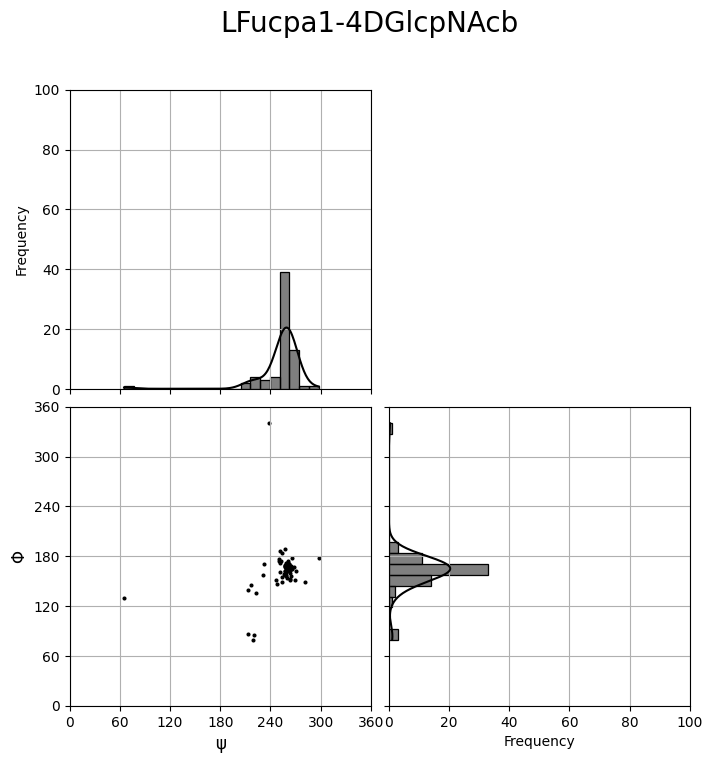

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)